(-0.5, 413.5, 388.5, -0.5)

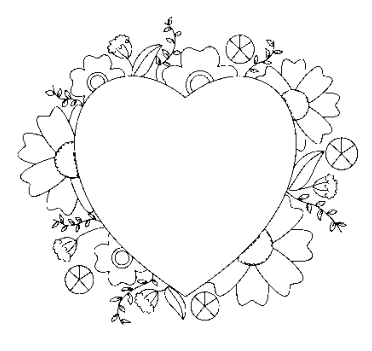

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Carregar a imagem colorida (substitua 'imagem.jpg' pelo caminho da sua imagem)
imagem_colorida = cv2.imread('bordado.png')
# Converte de BGR para RGB (pois o OpenCV lê em BGR)
imagem_colorida = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2RGB)

# Etapa 1: Converter para imagem em preto e branco (binária)
# Primeiro, converte para escala de cinza
imagem_cinza = cv2.cvtColor(imagem_colorida, cv2.COLOR_RGB2GRAY)

# Aplica um threshold para binarizar a imagem
# Ajuste o valor do threshold (127) conforme necessário para sua imagem
_, imagem_binaria = cv2.threshold(imagem_cinza, 127, 255, cv2.THRESH_BINARY)

# Exibe o resultado da Etapa 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)


plt.imshow(imagem_binaria, cmap='gray')
plt.axis('off')


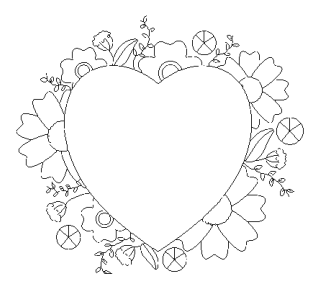

In [3]:
# Etapa 2: Afinar os traços pretos
# Para usar o skeletonize, invertemos a imagem para que os traços (preto) se tornem o objeto
imagem_invertida = cv2.bitwise_not(imagem_binaria)
# Normaliza para [0, 1] e converte para booleano
imagem_bool = imagem_invertida // 255
imagem_bool = imagem_bool.astype(bool)

# Aplica a função skeletonize
esqueleto = skeletonize(imagem_bool)
# Converte de booleano para [0, 255] (aqui os traços estão em branco e o fundo em preto)
esqueleto = np.uint8(esqueleto) * 255

# Inverte novamente para ter traços pretos sobre fundo branco
esqueleto_corrigido = cv2.bitwise_not(esqueleto)

# Exibe o resultado da Etapa 2
plt.subplot(1, 2, 2)
plt.imshow(esqueleto_corrigido, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

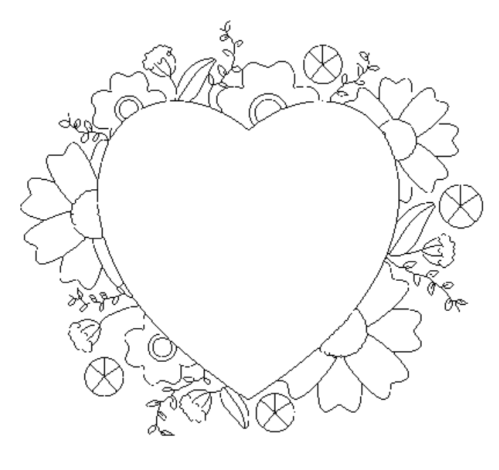

In [4]:
# Fator de escala (exemplo: 1.5)
fator_escala = 1.5
altura, largura = esqueleto_corrigido.shape[:2]
nova_largura = int(largura * fator_escala)
nova_altura = int(altura * fator_escala)
imagem_redimensionada = cv2.resize(esqueleto_corrigido, (nova_largura, nova_altura), interpolation=cv2.INTER_LINEAR)

# Exibe o resultado da Etapa 3
plt.imshow(imagem_redimensionada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Calcula os histogramas para cada canal na imagem colorida original
# hist_r = cv2.calcHist([imagem_redimensionada], [0], None, [256], [0, 256])
# hist_g = cv2.calcHist([imagem_redimensionada], [1], None, [256], [0, 256])
# hist_b = cv2.calcHist([imagem_redimensionada], [2], None, [256], [0, 256])

imagem_redimensionada_color = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_GRAY2RGB)
hist_r = cv2.calcHist([imagem_redimensionada_color], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([imagem_redimensionada_color], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([imagem_redimensionada_color], [2], None, [256], [0, 256])


# Converte os histogramas para listas
hist_r_list = hist_r.flatten().tolist()
hist_g_list = hist_g.flatten().tolist()
hist_b_list = hist_b.flatten().tolist()

# Imprime os valores de cada canal
print("Histograma do canal Vermelho (R):")
print(hist_r_list)
print("\nHistograma do canal Verde (G):")
print(hist_g_list)
print("\nHistograma do canal Azul (B):")
print(hist_b_list)

Histograma do canal Vermelho (R):
[22.0, 19.0, 19.0, 34.0, 51.0, 31.0, 49.0, 16.0, 17.0, 38.0, 31.0, 22.0, 19.0, 24.0, 52.0, 33.0, 20.0, 28.0, 24.0, 33.0, 30.0, 43.0, 24.0, 37.0, 29.0, 87.0, 38.0, 45.0, 85.0, 58.0, 38.0, 36.0, 46.0, 40.0, 14.0, 23.0, 19.0, 41.0, 11.0, 11.0, 10.0, 7.0, 2146.0, 39.0, 35.0, 41.0, 57.0, 48.0, 59.0, 52.0, 47.0, 41.0, 71.0, 87.0, 69.0, 101.0, 99.0, 111.0, 76.0, 72.0, 134.0, 97.0, 110.0, 111.0, 60.0, 53.0, 71.0, 51.0, 36.0, 51.0, 60.0, 44.0, 22.0, 36.0, 28.0, 24.0, 55.0, 55.0, 64.0, 56.0, 71.0, 56.0, 49.0, 75.0, 69.0, 67.0, 67.0, 66.0, 88.0, 67.0, 69.0, 75.0, 75.0, 38.0, 78.0, 77.0, 66.0, 75.0, 50.0, 40.0, 77.0, 58.0, 48.0, 45.0, 43.0, 65.0, 42.0, 66.0, 70.0, 72.0, 88.0, 69.0, 90.0, 94.0, 82.0, 122.0, 92.0, 79.0, 101.0, 66.0, 64.0, 53.0, 60.0, 70.0, 19.0, 23.0, 13.0, 3798.0, 39.0, 42.0, 57.0, 58.0, 87.0, 79.0, 110.0, 109.0, 117.0, 131.0, 141.0, 120.0, 165.0, 146.0, 147.0, 146.0, 106.0, 113.0, 52.0, 66.0, 42.0, 50.0, 51.0, 39.0, 46.0, 84.0, 101.0, 129.0, 98.0,

(-0.5, 620.5, 582.5, -0.5)

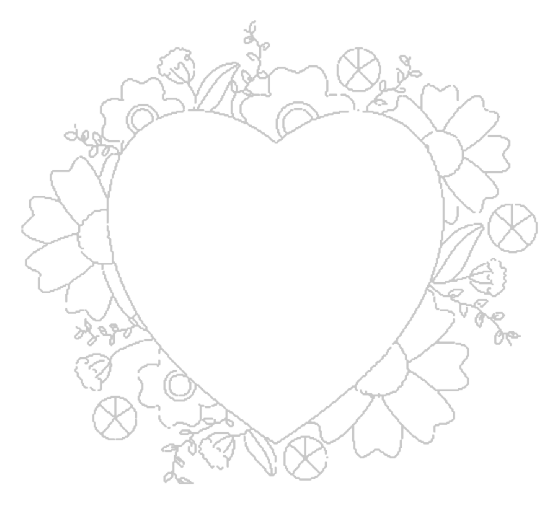

In [21]:
# ------------------------------
# Etapa 5: Tornar o Branco Transparente e pixels abaixo de RGB(200,200,200) em Preto
# ------------------------------
# Como a imagem redimensionada está em escala de cinza (apenas um canal), convertemos para RGB
imagem_rgb = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_GRAY2RGB)
# Converte para imagem com canal alfa (RGBA)
imagem_rgba = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_GRAY2RGBA)

# Cria uma máscara para os pixels que são totalmente brancos (255, 255, 255)
mask_white = (imagem_rgb[:, :, 0] == 255) & (imagem_rgb[:, :, 1] == 255) & (imagem_rgb[:, :, 2] == 255)
# Cria uma máscara para os pixels que estão abaixo de RGB(200,200,200)
mask_below = (imagem_rgb[:, :, 0] < 200) & (imagem_rgb[:, :, 1] < 200) & (imagem_rgb[:, :, 2] < 200)

# Para os pixels brancos, define o canal alfa como 0 (transparente)
imagem_rgba[mask_white, 3] = 0
# Para os pixels abaixo de (200,200,200), força os canais de cor para 0 (preto)
imagem_rgba[mask_below, :3] = 200

plt.figure(figsize=(40, 40))
plt.subplot(1, 5, 4)
plt.imshow(imagem_rgba)
plt.axis('off')